In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('purchase-data.csv')

In [5]:
df

,Name,country,Age,Salary,cars,Purchased
0,Mohan,India,44.0,72000,2.0,No
1,Raquel,Spain,27.0,48000,NaN,Yes
2,Ilsa,Spain,30.0,54000,NaN,No
3,Victor,Spain,38.0,61000,NaN,No
4,Leon,Spain,40.0,NaN,NaN,Yes
5,Mimi,Spain,35.0,58000,NaN,Yes
6,Anna,Spain,NaN,52000,NaN,No
7,Maria,Spain,48.0,79000,2.0,Yes
8,Natalie,Spain,50.0,83000,3.0,No
9,Ayshik,Spain,37.0,67000,1.0,Yes


# Handling missing data

In [6]:
#Handling missing data is important step in feature Engineering
df.isnull().sum()

Name          0
country       0
Age           4
Salary        2
cars         13
Purchased     0
dtype: int64

# Deleting the columns

In [7]:
df.drop('cars',axis=1)

,Name,country,Age,Salary,Purchased
0,Mohan,India,44.0,72000,No
1,Raquel,Spain,27.0,48000,Yes
2,Ilsa,Spain,30.0,54000,No
3,Victor,Spain,38.0,61000,No
4,Leon,Spain,40.0,NaN,Yes
5,Mimi,Spain,35.0,58000,Yes
6,Anna,Spain,NaN,52000,No
7,Maria,Spain,48.0,79000,Yes
8,Natalie,Spain,50.0,83000,No
9,Ayshik,Spain,37.0,67000,Yes


In [8]:
#splitting x and y
x=df.drop(['Purchased','Name','cars'],axis=1)
y=df['Purchased']

In [9]:
x

,country,Age,Salary
0,India,44.0,72000
1,Spain,27.0,48000
2,Spain,30.0,54000
3,Spain,38.0,61000
4,Spain,40.0,NaN
5,Spain,35.0,58000
6,Spain,NaN,52000
7,Spain,48.0,79000
8,Spain,50.0,83000
9,Spain,37.0,67000


# Impute Missing Values for Continuous Variable


In [10]:
#imputing missing  values of continous values can be done by using mean,mode,median
from sklearn.impute import SimpleImputer


In [11]:
imputer =SimpleImputer(missing_values=np.nan, strategy= "mean")


In [12]:
imputer = imputer.fit(x.iloc[:, 1:3])
x.iloc[:, 1:3] = imputer.transform(x.iloc[:, 1:3])

In [13]:
x.iloc[:, 1:3]

,Age,Salary
0,44.000000,72000.000
1,27.000000,48000.000
2,30.000000,54000.000
3,38.000000,61000.000
4,40.000000,59862.375
5,35.000000,58000.000
6,36.533333,52000.000
7,48.000000,79000.000
8,50.000000,83000.000
9,37.000000,67000.000


In [14]:
imputer

SimpleImputer()

# Feature Encoding for x variables

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



In [16]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(x))

In [17]:
X

array([[1.00000000e+00, 0.00000000e+00, 4.40000000e+01, 7.20000000e+04],
       [0.00000000e+00, 1.00000000e+00, 2.70000000e+01, 4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 3.00000000e+01, 5.40000000e+04],
       [0.00000000e+00, 1.00000000e+00, 3.80000000e+01, 6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 4.00000000e+01, 5.98623750e+04],
       [0.00000000e+00, 1.00000000e+00, 3.50000000e+01, 5.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 3.65333333e+01, 5.20000000e+04],
       [0.00000000e+00, 1.00000000e+00, 4.80000000e+01, 7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 5.00000000e+01, 8.30000000e+04],
       [0.00000000e+00, 1.00000000e+00, 3.70000000e+01, 6.70000000e+04],
       [0.00000000e+00, 1.00000000e+00, 3.65333333e+01, 5.60000000e+04],
       [0.00000000e+00, 1.00000000e+00, 4.20000000e+01, 7.60000000e+04],
       [0.00000000e+00, 1.00000000e+00, 3.65333333e+01, 7.60000000e+04],
       [0.00000000e+00, 1.00000000e+00, 3.40000000e

# Feature Encoding for y variable

In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [19]:
y

array([1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1])

# Feature Scalinng

In [20]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain[:, 3:] = sc.fit_transform(Xtrain[:, 3:])
Xtest[:, 3:] = sc.transform(Xtest[:, 3:])


In [23]:
Xtrain

array([[ 0.        ,  1.        , 30.        , -0.6412701 ],
       [ 0.        ,  1.        , 36.53333333, -1.24636567],
       [ 0.        ,  1.        , 40.        , -0.20877838],
       [ 0.        ,  1.        , 32.        , -2.26430137],
       [ 0.        ,  1.        , 48.        ,  1.20308361],
       [ 0.        ,  1.        , 27.        , -1.08391499],
       [ 0.        ,  1.        , 34.        , -0.20877838],
       [ 1.        ,  0.        , 44.        ,  0.68666457],
       [ 0.        ,  1.        , 39.        ,  0.53911627],
       [ 0.        ,  1.        , 28.        , -0.20877838],
       [ 0.        ,  1.        , 37.        ,  0.31779383],
       [ 0.        ,  1.        , 50.        ,  1.4981802 ],
       [ 0.        ,  1.        , 36.53333333,  0.98176116],
       [ 0.        ,  1.        , 42.        ,  0.98176116],
       [ 0.        ,  1.        , 35.        , -0.34617351]])

# Feature Selection

In [5]:
df = pd.read_csv("ABOLENE.csv")

In [6]:
df

,SEX,LENGTH,DIAMETER,HEIGHT,WHOLE WEIGHT,SHUCKED WEIGHT,VISCERA WEIGHT,SHELL WEIGHT,RINGS
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.head()

,SEX,LENGTH,DIAMETER,HEIGHT,WHOLE WEIGHT,SHUCKED WEIGHT,VISCERA WEIGHT,SHELL WEIGHT,RINGS
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df['AGE']=np.where(df['RINGS']>12,'Adult','Young')

In [9]:
df1=df.drop('RINGS',axis=1)

In [10]:
df1

,SEX,LENGTH,DIAMETER,HEIGHT,WHOLE WEIGHT,SHUCKED WEIGHT,VISCERA WEIGHT,SHELL WEIGHT,AGE
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Adult
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Young
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Young
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Young
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Young
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Young
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Young


In [11]:
df1['SEX'] = df1['SEX'].replace({'M':0, 'F':1, 'I':2})

In [12]:
df['SEX']

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: SEX, Length: 4177, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier


In [14]:
x=df1.drop('AGE',axis=1)
y=df1['AGE']

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size =0.20)

In [18]:
model = ExtraTreesClassifier()

In [19]:
model.fit(xtrain, ytrain)

ExtraTreesClassifier()

In [20]:
model.feature_importances_

array([0.05014283, 0.11039226, 0.10881675, 0.1160026 , 0.13646892,
       0.16163724, 0.11940428, 0.19713512])

In [21]:
importance = pd.DataFrame()
importance['columns'] = xtrain.columns
importance['feature_score'] = model.feature_importances_

In [22]:
importance 

,columns,feature_score
0,SEX,0.050143
1,LENGTH,0.110392
2,DIAMETER,0.108817
3,HEIGHT,0.116003
4,WHOLE WEIGHT,0.136469
5,SHUCKED WEIGHT,0.161637
6,VISCERA WEIGHT,0.119404
7,SHELL WEIGHT,0.197135


<function matplotlib.pyplot.show(close=None, block=None)>

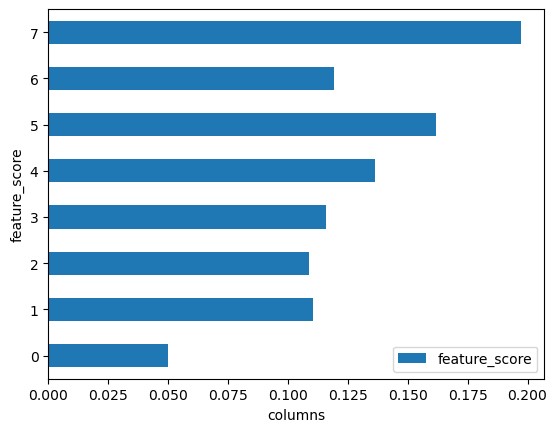

In [23]:
importance.plot(kind='barh')
plt.xlabel("columns")
plt.ylabel("feature_score")
plt.show
